In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [99]:

url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
df = pd.read_csv(url)

# Mostriamo un’anteprima
print(df.head())
print(df.info())


   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4   

In [100]:
# 1. lavoro (job)
job_mapping = {
    "management":4,
    "admin.":8,
    "entrepreneur":3,
    "technician":7,
    "self-employed":3,
    "blue-collar":6,
    "services":4,
    "retired":5,
    "housemaid":2,
    "student":3,
    "unemployed":3,
    "unknown":0
}

# 2. coniugale (marital)
marital_mapping = {
    'divorced': 1, 'married': 3, 'single': 2, 'unknown': 0
}

# 3. istruzione (education)
education_mapping = {
    'unknown': 3,
    'basic.4y': 4,
    'university.degree': 8,
    'high.school': 7,
    'basic.9y': 5,
    'professional.course': 6,
    'basic.6y': 2,
    'illiterate': 1
}

# 4. default, housing, loan
binary_mapping = {'no': 1, 'yes': 2, 'unknown': 0}

# 5. contact
contact_mapping = {'cellular': 1, 'telephone': 0}

# 6. month
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# 7. day_of_week
day_mapping = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}

# 8. poutcome
poutcome_mapping = {'failure': 0, 'nonexistent': 1, 'success': 2}

# 9. output y
output_mapping = {'no': 0, 'yes': 1}

# Applica tutti i mapping
df = df.replace({
    'job': job_mapping,
    'marital': marital_mapping,
    'education': education_mapping,
    'default': binary_mapping,
    'housing': binary_mapping,
    'loan': binary_mapping,
    'contact': contact_mapping,
    'month': month_mapping,
    'day_of_week': day_mapping,
    'poutcome': poutcome_mapping,
    'y': output_mapping
})


C:\Users\lauda\AppData\Local\Temp\ipykernel_9292\4072563829.py:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


In [101]:
df = df.drop(columns=['duration'])


In [102]:
X = df.drop("y", axis=1)
y = df["y"]


In [103]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
model = LogisticRegression(solver= 'liblinear', random_state=1)
model.fit(X_train, y_train)


LogisticRegression(random_state=1, solver='liblinear')

In [106]:
y_pred = model.predict(X_test) 
score_ = model.score(X_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Intercept:', model.intercept_)
print('Coef:', model.coef_, end='\n\n')
print('Classi:', model.classes_) 
print('score_:', score_, end='\n\n')
print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')


Intercept: [0.00220087]
Coef: [[ 0.00298913  0.01070889 -0.00847062  0.04852483  0.02804964  0.00383371
  -0.00141349  0.04211994  0.02751087  0.01555336 -0.05496252 -0.00153687
   0.00156749  0.01366585 -0.19749813  0.18432337  0.02806169 -0.21717258
  -0.00326765]]

Classi: [0 1]
score_: 0.8991260014566642

conf_m:
[[7201   94]
 [ 737  206]]

report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7295
           1       0.69      0.22      0.33       943

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



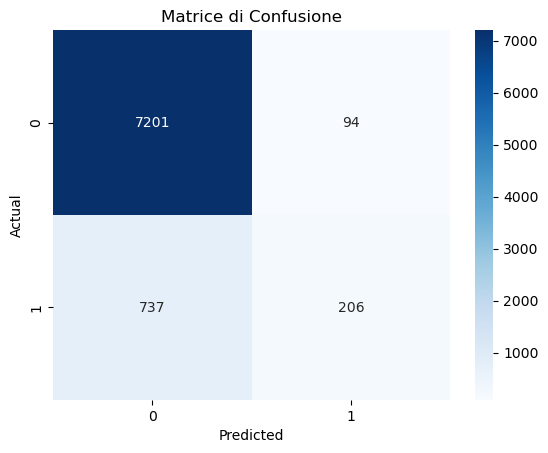

In [107]:
import seaborn as sns
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice di Confusione')
plt.show()
